In [1]:
import pandas as pd
import numpy as np
import orbit
import matplotlib.pyplot as plt

from orbit.utils.dataset import load_iclaims
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.utils.plot import get_orbit_style
plt.style.use(get_orbit_style())
from orbit.models import ETS

In [2]:
orbit.__version__

'1.1.1dev'

In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [4]:
# can also consider transform=False
raw_df = load_iclaims(transform=True)
raw_df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [5]:
df = raw_df.copy()

In [6]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


In [7]:
test_size=52

train_df=df[:-test_size]
test_df=df[-test_size:]

In [8]:
ets = ETS(response_col='claims',
          date_col='week',
          seasonality=52,
          seed=2020,
          estimator='stan-mcmc',
)

In [9]:
ets.fit(train_df)

INFO:orbit:Sampling (PyStan) with chains:4, cores:8, temperature:1.0, warmups per chain:225 and samples per chain:25.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [10]:
predicted_df = ets.predict(df=df, decompose=True)
predicted_df

,week,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_5,seasonality,seasonality_95
0,2010-01-03,13.256272,13.386927,13.498986,12.933694,13.052863,13.171584,0.280179,0.333392,0.372758
1,2010-01-10,13.472728,13.620061,13.757311,12.951441,13.059028,13.168616,0.470173,0.560221,0.633116
2,2010-01-17,13.227783,13.369212,13.521314,12.930531,13.058354,13.201711,0.219143,0.318197,0.410537
3,2010-01-24,12.967776,13.152340,13.273238,12.904842,13.063404,13.159577,0.012210,0.079733,0.157075
4,2010-01-31,13.035373,13.183300,13.293310,12.940405,13.077334,13.165723,0.019560,0.105105,0.204010
...,...,...,...,...,...,...,...,...,...,...
438,2018-05-27,12.103508,12.349675,12.552289,12.197117,12.443412,12.660921,-0.115319,-0.098075,-0.077511
439,2018-06-03,12.076320,12.275867,12.457235,12.231496,12.444770,12.641288,-0.185560,-0.166449,-0.147703
440,2018-06-10,12.159133,12.370262,12.566124,12.218492,12.441639,12.628808,-0.084846,-0.067089,-0.046236
441,2018-06-17,12.137474,12.331943,12.546059,12.229498,12.427892,12.654898,-0.115621,-0.096948,-0.075482


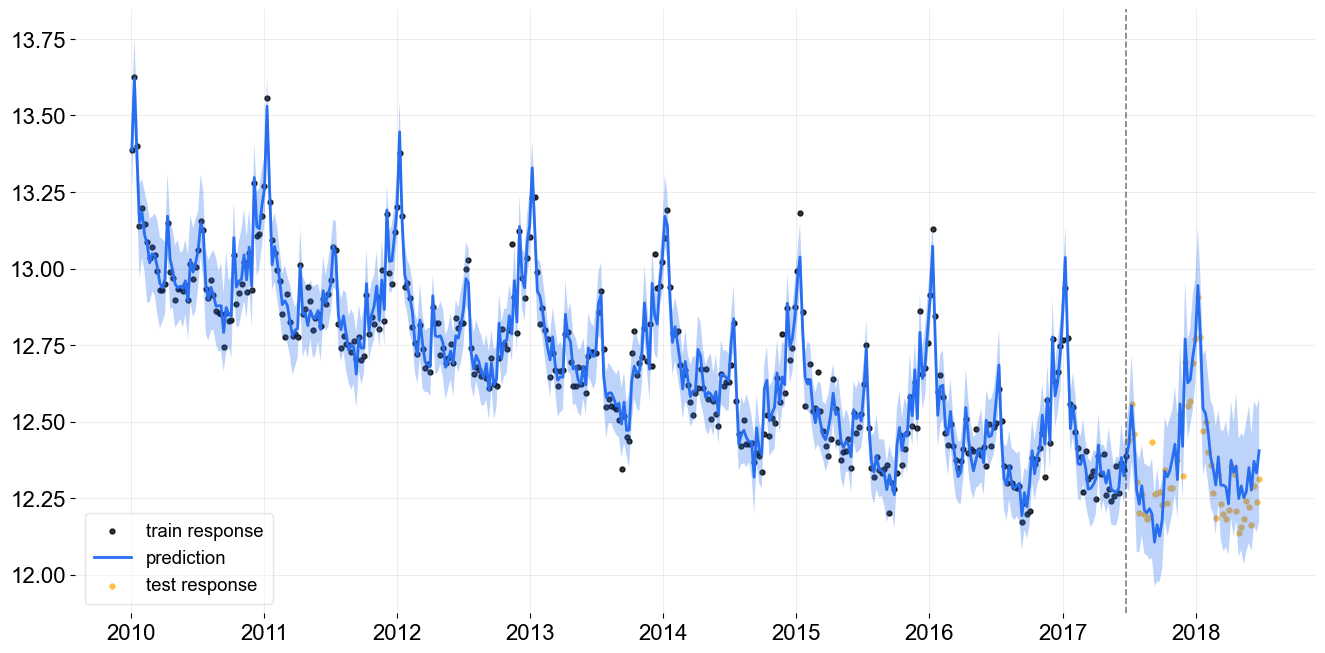

In [11]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col='week',
                        actual_col='claims',
                        test_actual_df=test_df)

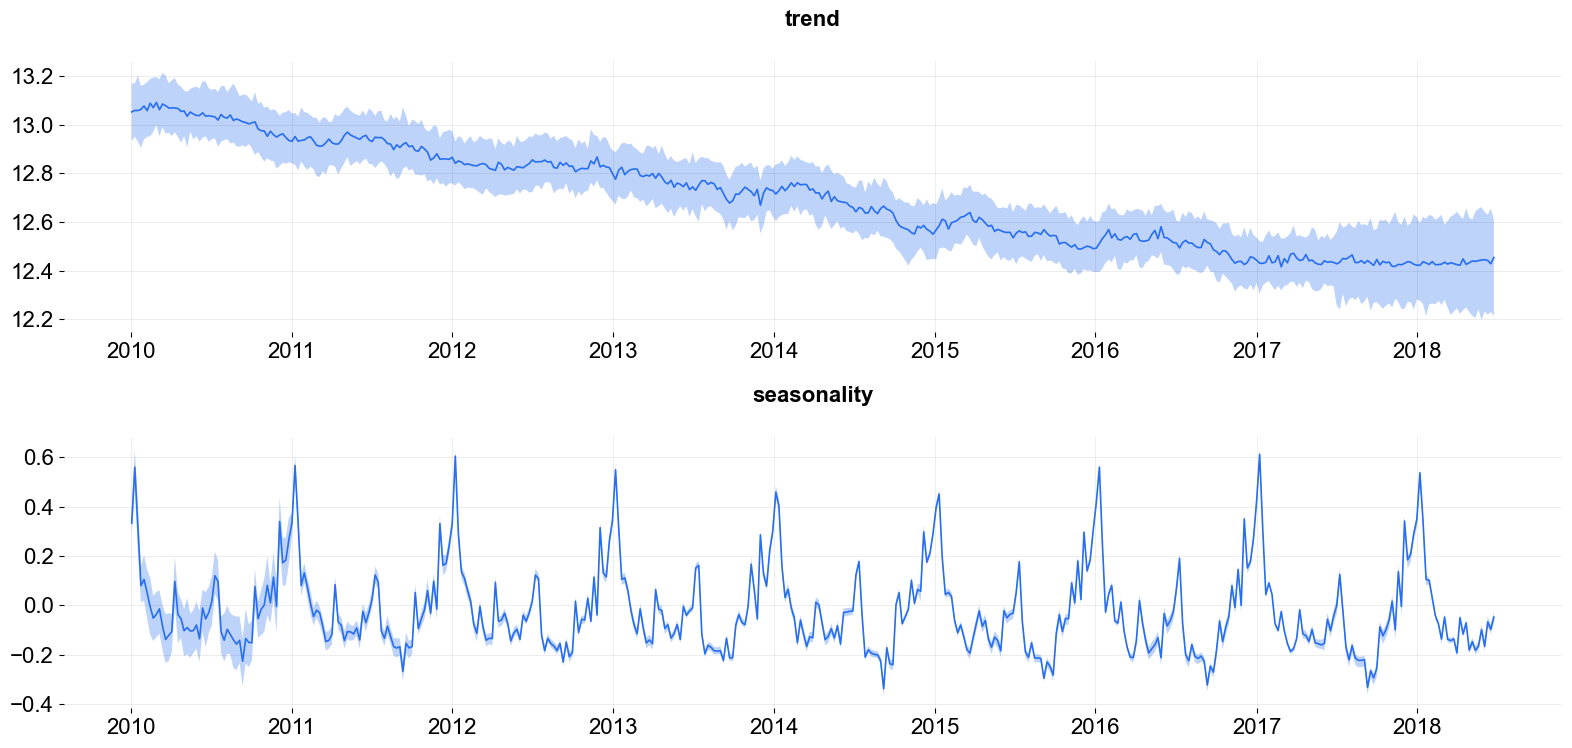

In [12]:
_ = plot_predicted_components(predicted_df=predicted_df, date_col='week')